# Denoising by Delaunay triangulation on zeros

In [6]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.method_delaunay_triangulation import delaunay_triangulation_denoising

In [7]:
np.random.seed(0)
# signal parameters
SNRin = 30
N = 2**9
Nsub = 2**8
sbank = SignalBank(N=N,Nsub=Nsub)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_linear_chirp()
# s = sbank.signal_mc_parallel_chirps_unbalanced()
# s = sbank.signal_mc_parallel_chirps()

s = sbank.signal_mc_multi_linear()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_double_cos_chirp()
# s = sbank.signal_mc_on_off_tones()
# s = sbank.signal_mc_synthetic_mixture_2() # Mala.
# s = sbank.signal_mc_multi_cos_2()

signal, noise = add_snr(s,SNRin, complex_noise=True)
signal = s + noise*np.sqrt(N/Nsub) 

snr_out:30.0


In [8]:
Nfft = 2*N
g,T = get_round_window(Nfft)
Lx = Nfft/T
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
output = delaunay_triangulation_denoising(signal,
                                            return_dic = True,
                                            adapt_thr=False,
                                            grouping=True,
                                            min_group_size=1,
                                            LB = 1.9,
                                            )
s_r, mask, tri, tri_select, zeros = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )

print("QRF={}".format(10*np.log10((np.sum(s**2))/(np.sum((s-s_r)**2)))))

c:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-demo\.venv\lib\site-packages\scipy\signal\_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


QRF=32.56707353672242


QRF=32.7129046409995


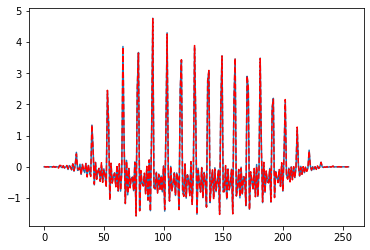

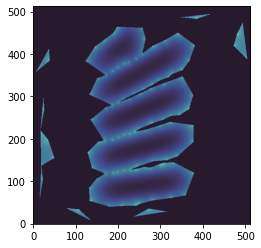

In [9]:
s_r_e = s_r[tmin:tmax]
s_e = s[tmin:tmax]                                    
print("QRF={}".format(10*np.log10((np.sum(s_e**2))/(np.sum((s_e-s_r_e)**2)))))

plt.figure()
plt.plot(s_e)
plt.plot(s_r_e,'--r')

plt.figure()
plt.imshow(np.log10(S)*mask, origin='lower', cmap=cmocean.cm.deep)

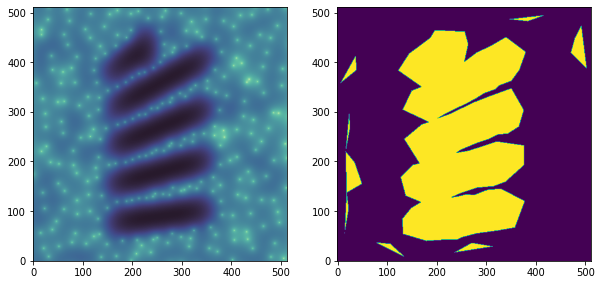

In [10]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
plt.show()